In [25]:
import pandas as pd
from pathlib import Path

DATA_dir = Path("../data/raw")

file_path = DATA_dir / "Building_Permits.csv"

df = pd.read_csv(file_path)



cols_to_drop = [
    "Street Number Suffix",
    "Unit Suffix",
    "Structural Notification"
]

df = df.drop(columns=cols_to_drop)

date_cols = [
    "Permit Creation Date",
    "Current Status Date",
    "Filed Date",
    "Issued Date",
    "Completed Date",
    "Permit Expiration Date",
    "First Construction Document Date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors = "coerce")


numeric_cols = [
    "Existing Units",
    "Proposed Units",
    "Existing Construction Type",
    "Proposed Construction Type",
    "Number of Existing Stories",
    "Number of Proposed Stories"
]

for col in numeric_cols:
    median_value = df[col].median()
    df[col]= df[col].fillna(median_value)

df["Is_Completed"] = df["Completed Date"].notna().astype(int)
df["Has_Expired_Date"] = df["Permit Expiration Date"].notna().astype(int)

df = df.drop_duplicates(subset=["Record ID"])

OUT_DIR = Path("../data/clean")

OUT_DIR.mkdir(parents=True, exist_ok=True)

df.to_csv(OUT_DIR / "Building_Permits_Cleaned.csv", index=False)
df.head()
df.info()
df.isna().sum().sort_values(ascending=False).head(20)

C:\Users\hlain\AppData\Local\Temp\ipykernel_18152\3351110710.py:8: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           198900 non-null  object        
 1   Permit Type                             198900 non-null  int64         
 2   Permit Type Definition                  198900 non-null  object        
 3   Permit Creation Date                    198900 non-null  datetime64[ns]
 4   Block                                   198900 non-null  object        
 5   Lot                                     198900 non-null  object        
 6   Street Number                           198900 non-null  int64         
 7   Street Name                             198900 non-null  object        
 8   Street Suffix                           196132 non-null  object        
 9   Unit                                 

TIDF Compliance                           198898
Voluntary Soft-Story Retrofit             198865
Site Permit                               193541
Fire Only Permit                          180073
Unit                                      169421
Completed Date                            101709
Permit Expiration Date                     51880
Existing Construction Type Description     43366
Proposed Construction Type Description     43162
Proposed Use                               42439
Existing Use                               41114
Estimated Cost                             38066
Plansets                                   37309
First Construction Document Date           14946
Issued Date                                14940
Revised Cost                                6066
Street Suffix                               2768
Neighborhoods - Analysis Boundaries         1725
Supervisor District                         1717
Zipcode                                     1716
dtype: int64

C:\Users\hlain\AppData\Local\Temp\ipykernel_18152\1212136909.py:6: DtypeWarning: Columns (19,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv(Data_dir, parse_dates=[


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           198900 non-null  object        
 1   Permit Type                             198900 non-null  int64         
 2   Permit Type Definition                  198900 non-null  object        
 3   Permit Creation Date                    198900 non-null  datetime64[ns]
 4   Block                                   198900 non-null  object        
 5   Lot                                     198900 non-null  object        
 6   Street Number                           198900 non-null  int64         
 7   Street Name                             198900 non-null  object        
 8   Street Suffix                           196132 non-null  object        
 9   Unit                                 

<Axes: title={'center': 'Number of Permits Filed per Year'}, xlabel='year_filled'>

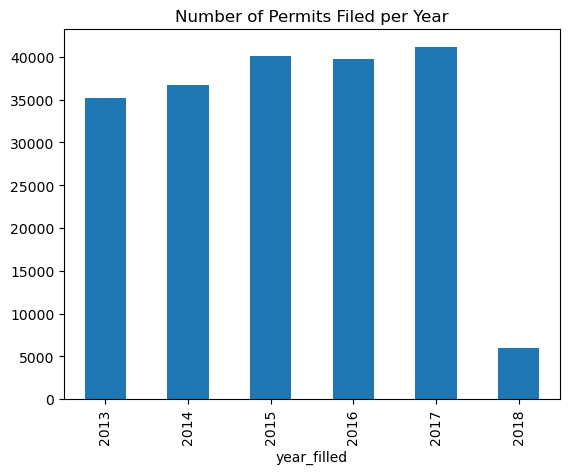

In [33]:
import pandas as pd
from pathlib import Path

Data_dir = Path("../data/clean/Building_Permits_Cleaned.csv")

df_clean = pd.read_csv(Data_dir, parse_dates=[
    "Permit Creation Date",
    "Current Status Date",
    "Filed Date",
    "Issued Date",
    "Completed Date",
    "Permit Expiration Date",
    "First Construction Document Date"
]
    )

df_clean.head()
df_clean.info()


status_counts = df_clean["Is_Completed"].value_counts()
print(status_counts)


df_clean["year_filled"] = df_clean["Filed Date"].dt.year
permit_per_year = df_clean.groupby("year_filled").size()
print(permit_per_year)

permit_per_year.plot(kind="bar", title="Number of Permits Filed per Year")



